### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Explore Data

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)  # Skip the first row (it's metadata)

In [4]:
print(df.head())
print(df.info())
print(df.describe())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [5]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


### Data Preprocessing

In [6]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [7]:
df = df.fillna(df.median())  # For numerical columns

In [8]:
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

### Feature Engineering

In [9]:
df['PAYMENT_RATIO'] = df['PAY_AMT1'] / (df['BILL_AMT1'] + 1e-6)  # Avoid division by zero

In [10]:
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['AVG_BILL_AMT'] = df[bill_cols].mean(axis=1)

In [11]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['AVG_PAY_DELAY'] = df[pay_cols].mean(axis=1)

### Split the Data

In [12]:
X = df.drop(['ID', 'default'], axis=1)
y = df['default']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale Data

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build and Train Model

In [15]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

In [16]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8158333333333333
ROC-AUC: 0.7596443696822457
Confusion Matrix:
 [[4419  268]
 [ 837  476]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### Interpret Results

In [18]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

PAY_0            0.084482
AVG_PAY_DELAY    0.069226
AGE              0.061246
LIMIT_BAL        0.054500
AVG_BILL_AMT     0.053524
BILL_AMT1        0.050962
BILL_AMT2        0.046747
BILL_AMT3        0.045532
BILL_AMT6        0.044395
BILL_AMT5        0.044267
BILL_AMT4        0.044184
PAY_AMT1         0.043831
PAY_AMT2         0.041995
PAY_AMT6         0.041480
PAY_AMT3         0.041054
PAY_AMT5         0.038615
PAY_AMT4         0.037817
PAY_2            0.030279
PAY_3            0.018840
PAY_4            0.018319
PAY_6            0.014193
PAY_5            0.011504
SEX_2            0.010890
PAYMENT_RATIO    0.008560
EDUCATION_2      0.008433
MARRIAGE_1       0.008418
MARRIAGE_2       0.008215
EDUCATION_1      0.007864
EDUCATION_3      0.006921
MARRIAGE_3       0.001748
EDUCATION_5      0.001064
EDUCATION_6      0.000485
EDUCATION_4      0.000407
dtype: float64


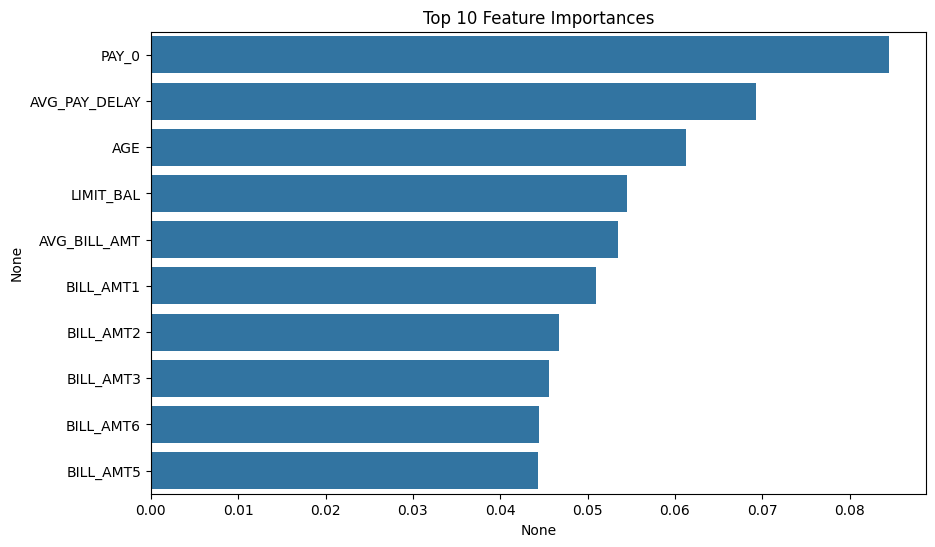

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False).head(10), 
            y=feature_importances.sort_values(ascending=False).head(10).index)
plt.title('Top 10 Feature Importances')
plt.show()